In [3]:
import re
import requests
from bs4 import BeautifulSoup

In [4]:
url='https://www.happimobiles.com/mobiles/all'
page=requests.get(url)
page

<Response [200]>

In [5]:
soup=BeautifulSoup(page.text)
soup

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
<head>
<meta content="width=device-width, initial-scale=1" data-n-head="ssr" name="viewport"/><meta content="A8-v_RS8fjFbLb7M55XNg8MXvGPeRdMvnh-mllqGAHM" data-hid="google-site-verification" data-n-head="ssr" name="google-site-verification"/><meta charset="utf-8" data-hid="charset" data-n-head="ssr"/><meta data-hid="lang" data-n-head="ssr" lang="en"/><meta data-hid="language" data-n-head="ssr" language="English"/><meta content="Happi Mobiles" data-hid="name" data-n-head="ssr" key="name" name="name" property="name"/><meta content="Shop latest mobiles, android mobiles, branded mobiles online at best prices in India. Read product specifications and offers before purchase." data-hid="description" data-n-head="ssr" key="description" name="description" property="description"/><meta content="Happi Mobiles" data-hid="og:site_name" data-n-head="ssr" key="og:site_name" name="og:site_name" p

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

base_url = 'https://www.happimobiles.com/mobiles/all?page='
headers = {'User-Agent': 'Mozilla/5.0'}

all_products = []
page = 1

while len(all_products) < 400:
    print(f"Scraping page {page}...")
    response = requests.get(base_url + str(page), headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    products = soup.find_all(class_='ps-product__title')
    if not products:
        break

    for product in products:
        title = product.get_text(strip=True)
        link_tag = product.find('a')
        product_url = link_tag['href'] if link_tag and link_tag.has_attr('href') else None

        price_tag = product.find_next('b')
        discounted_price = price_tag.get_text(strip=True) if price_tag else None

        original_tag = product.find_next('s')
        original_price = original_tag.get_text(strip=True) if original_tag else None

        # Calculate discount
        try:
            original = float(original_price.replace('₹', '').replace(',', ''))
            discounted = float(discounted_price.replace('₹', '').replace(',', ''))
            discount_percent = round(((original - discounted) / original) * 100)
        except:
            discount_percent = None

        # Extract brand from title (basic heuristic)
        brand = title.split()[0] if title else None

        # Static values for category and availability (can be refined)
        category = 'Mobiles'
        availability = 'In Stock'  # You can refine this if the site shows actual stock info

        all_products.append({
            'Product Name': title,
            'Brand': brand,
            'Original Price': original_price,
            'Discounted Price': discounted_price,
            'Discount %': discount_percent,
            'Product URL': product_url,
            'Category': category,
            'Availability': availability
        })

    page += 1

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...


In [7]:
import pandas as pd

# Convert list of dictionaries to DataFrame
df = pd.DataFrame(all_products)

# Show the first few rows
print(df.head())

# Optional: Check how many rows you got
print(f"\n Total rows in DataFrame: {len(df)}")

                           Product Name    Brand Original Price  \
0                               Bidding  Bidding         ₹10.00   
1                                           None         ₹10.00   
2       Realme C71 4G Sea Blue 4GB|64GB   Realme      ₹9,999.00   
3  Vivo T4 Lite 5G Prism Blue 4GB|128GB     Vivo     ₹14,999.00   
4     Realme C73 5G Jade Green 4GB|64GB   Realme     ₹12,999.00   

  Discounted Price  Discount % Product URL Category Availability  
0            ₹1.00          90        None  Mobiles     In Stock  
1            ₹2.00          80        None  Mobiles     In Stock  
2        ₹7,799.00          22        None  Mobiles     In Stock  
3       ₹10,299.00          31        None  Mobiles     In Stock  
4       ₹10,599.00          18        None  Mobiles     In Stock  

 Total rows in DataFrame: 400



### Export DataFrame to CSV


In [8]:
df.to_csv('happimobiles_products.csv', index=False)

print("Data exported to 'happimobiles_products.csv'")


Data exported to 'happimobiles_products.csv'


### Read CSV File 

In [9]:
df=pd.read_csv("happimobiles_products.csv")
df

,Product Name,Brand,Original Price,Discounted Price,Discount %,Product URL,Category,Availability
0,Bidding,Bidding,₹10.00,₹1.00,90,NaN,Mobiles,In Stock
1,NaN,NaN,₹10.00,₹2.00,80,NaN,Mobiles,In Stock
2,Realme C71 4G Sea Blue 4GB|64GB,Realme,"₹9,999.00","₹7,799.00",22,NaN,Mobiles,In Stock
3,Vivo T4 Lite 5G Prism Blue 4GB|128GB,Vivo,"₹14,999.00","₹10,299.00",31,NaN,Mobiles,In Stock
4,Realme C73 5G Jade Green 4GB|64GB,Realme,"₹12,999.00","₹10,599.00",18,NaN,Mobiles,In Stock
...,...,...,...,...,...,...,...,...
395,Redmi 13 5G Hawaiian Blue 6GB|128GB,Redmi,"₹15,999.00","₹14,099.00",12,NaN,Mobiles,In Stock
396,Oppo A77 4G Blue 4GB|64GB,Oppo,"₹15,599.00","₹14,499.00",7,NaN,Mobiles,In Stock
397,Redmi 15 5G Sandy Purple 6GB|128GB,Redmi,"₹17,999.00","₹15,099.00",16,NaN,Mobiles,In Stock
398,Redmi 15 5G Midnight Black 6GB|128GB,Redmi,"₹17,999.00","₹15,099.00",16,NaN,Mobiles,In Stock


In [10]:
df.head()

,Product Name,Brand,Original Price,Discounted Price,Discount %,Product URL,Category,Availability
0,Bidding,Bidding,₹10.00,₹1.00,90,NaN,Mobiles,In Stock
1,NaN,NaN,₹10.00,₹2.00,80,NaN,Mobiles,In Stock
2,Realme C71 4G Sea Blue 4GB|64GB,Realme,"₹9,999.00","₹7,799.00",22,NaN,Mobiles,In Stock
3,Vivo T4 Lite 5G Prism Blue 4GB|128GB,Vivo,"₹14,999.00","₹10,299.00",31,NaN,Mobiles,In Stock
4,Realme C73 5G Jade Green 4GB|64GB,Realme,"₹12,999.00","₹10,599.00",18,NaN,Mobiles,In Stock


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Name      375 non-null    object 
 1   Brand             375 non-null    object 
 2   Original Price    400 non-null    object 
 3   Discounted Price  400 non-null    object 
 4   Discount %        400 non-null    int64  
 5   Product URL       0 non-null      float64
 6   Category          400 non-null    object 
 7   Availability      400 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.1+ KB


In [12]:
df.describe()

,Discount %,Product URL
count,400.000000,0.0
mean,29.000000,NaN
std,23.075011,NaN
min,7.000000,NaN
25%,16.000000,NaN
50%,22.000000,NaN
75%,32.500000,NaN
max,90.000000,NaN


In [13]:
df.shape

(400, 8)

### Clean the Data 

In [14]:
df.isnull().sum()

Product Name         25
Brand                25
Original Price        0
Discounted Price      0
Discount %            0
Product URL         400
Category              0
Availability          0
dtype: int64

In [15]:
df

,Product Name,Brand,Original Price,Discounted Price,Discount %,Product URL,Category,Availability
0,Bidding,Bidding,₹10.00,₹1.00,90,NaN,Mobiles,In Stock
1,NaN,NaN,₹10.00,₹2.00,80,NaN,Mobiles,In Stock
2,Realme C71 4G Sea Blue 4GB|64GB,Realme,"₹9,999.00","₹7,799.00",22,NaN,Mobiles,In Stock
3,Vivo T4 Lite 5G Prism Blue 4GB|128GB,Vivo,"₹14,999.00","₹10,299.00",31,NaN,Mobiles,In Stock
4,Realme C73 5G Jade Green 4GB|64GB,Realme,"₹12,999.00","₹10,599.00",18,NaN,Mobiles,In Stock
...,...,...,...,...,...,...,...,...
395,Redmi 13 5G Hawaiian Blue 6GB|128GB,Redmi,"₹15,999.00","₹14,099.00",12,NaN,Mobiles,In Stock
396,Oppo A77 4G Blue 4GB|64GB,Oppo,"₹15,599.00","₹14,499.00",7,NaN,Mobiles,In Stock
397,Redmi 15 5G Sandy Purple 6GB|128GB,Redmi,"₹17,999.00","₹15,099.00",16,NaN,Mobiles,In Stock
398,Redmi 15 5G Midnight Black 6GB|128GB,Redmi,"₹17,999.00","₹15,099.00",16,NaN,Mobiles,In Stock


In [19]:
df.head()

,Product Name,Brand,Original Price,Discounted Price,Discount %,Product URL,Category,Availability
0,Bidding,Bidding,₹10.00,₹1.00,90,NaN,Mobiles,In Stock
1,NaN,NaN,₹10.00,₹2.00,80,NaN,Mobiles,In Stock
2,Realme C71 4G Sea Blue 4GB|64GB,Realme,"₹9,999.00","₹7,799.00",22,NaN,Mobiles,In Stock
3,Vivo T4 Lite 5G Prism Blue 4GB|128GB,Vivo,"₹14,999.00","₹10,299.00",31,NaN,Mobiles,In Stock
4,Realme C73 5G Jade Green 4GB|64GB,Realme,"₹12,999.00","₹10,599.00",18,NaN,Mobiles,In Stock


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Name      375 non-null    object 
 1   Brand             375 non-null    object 
 2   Original Price    400 non-null    object 
 3   Discounted Price  400 non-null    object 
 4   Discount %        400 non-null    int64  
 5   Product URL       0 non-null      float64
 6   Category          400 non-null    object 
 7   Availability      400 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.1+ KB


In [28]:
df.rename(columns={
    'product_name': 'Product',
    'brand': 'Brand_Name',
    'original_price': 'MRP',
    'discounted_price': 'Selling_Price',
    'discount_%': 'Discount_Percent',
    'product_url': 'URL',
    'category': 'Product_Category',
    'availability': 'Stock_Status'
}, inplace=True)

In [29]:
df

,Product Name,Brand,Original Price,Discounted Price,Discount %,Category,Availability
0,Bidding,Bidding,₹10.00,₹1.00,90,Mobiles,In Stock
1,NaN,NaN,₹10.00,₹2.00,80,Mobiles,In Stock
2,Realme C71 4G Sea Blue 4GB|64GB,Realme,"₹9,999.00","₹7,799.00",22,Mobiles,In Stock
3,Vivo T4 Lite 5G Prism Blue 4GB|128GB,Vivo,"₹14,999.00","₹10,299.00",31,Mobiles,In Stock
4,Realme C73 5G Jade Green 4GB|64GB,Realme,"₹12,999.00","₹10,599.00",18,Mobiles,In Stock
...,...,...,...,...,...,...,...
395,Redmi 13 5G Hawaiian Blue 6GB|128GB,Redmi,"₹15,999.00","₹14,099.00",12,Mobiles,In Stock
396,Oppo A77 4G Blue 4GB|64GB,Oppo,"₹15,599.00","₹14,499.00",7,Mobiles,In Stock
397,Redmi 15 5G Sandy Purple 6GB|128GB,Redmi,"₹17,999.00","₹15,099.00",16,Mobiles,In Stock
398,Redmi 15 5G Midnight Black 6GB|128GB,Redmi,"₹17,999.00","₹15,099.00",16,Mobiles,In Stock


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product Name      375 non-null    object
 1   Brand             375 non-null    object
 2   Original Price    400 non-null    object
 3   Discounted Price  400 non-null    object
 4   Discount %        400 non-null    int64 
 5   Category          400 non-null    object
 6   Availability      400 non-null    object
dtypes: int64(1), object(6)
memory usage: 22.0+ KB


In [33]:
# Checking Null Values
df.isnull().sum()

Product Name        25
Brand               25
Original Price       0
Discounted Price     0
Discount %           0
Category             0
Availability         0
dtype: int64

In [178]:
df['Product Name'] = df['Product Name'] + '_' + df.groupby('Product Name').cumcount().astype(str)

In [179]:
df.duplicated().sum()

0

In [35]:
df["Product Name"].isna()

0      False
1       True
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Name: Product Name, Length: 400, dtype: bool

In [37]:
df["Product Name"].fillna(df['Product Name'].mode()[0],inplace=True)

In [41]:
df['Brand'] = df['Brand'].fillna(df['Brand'].mode()[0])


In [42]:
df["Product Name"]=df["Product Name"].fillna(df["Product Name"].mode()[0])

In [43]:
df

,Product Name,Brand,Original Price,Discounted Price,Discount %,Category,Availability
0,Bidding,Bidding,₹10.00,₹1.00,90,Mobiles,In Stock
1,Bidding,Realme,₹10.00,₹2.00,80,Mobiles,In Stock
2,Realme C71 4G Sea Blue 4GB|64GB,Realme,"₹9,999.00","₹7,799.00",22,Mobiles,In Stock
3,Vivo T4 Lite 5G Prism Blue 4GB|128GB,Vivo,"₹14,999.00","₹10,299.00",31,Mobiles,In Stock
4,Realme C73 5G Jade Green 4GB|64GB,Realme,"₹12,999.00","₹10,599.00",18,Mobiles,In Stock
...,...,...,...,...,...,...,...
395,Redmi 13 5G Hawaiian Blue 6GB|128GB,Redmi,"₹15,999.00","₹14,099.00",12,Mobiles,In Stock
396,Oppo A77 4G Blue 4GB|64GB,Oppo,"₹15,599.00","₹14,499.00",7,Mobiles,In Stock
397,Redmi 15 5G Sandy Purple 6GB|128GB,Redmi,"₹17,999.00","₹15,099.00",16,Mobiles,In Stock
398,Redmi 15 5G Midnight Black 6GB|128GB,Redmi,"₹17,999.00","₹15,099.00",16,Mobiles,In Stock


In [47]:
df.isnull().sum()

Product Name        0
Brand               0
Original Price      0
Discounted Price    0
Discount %          0
Category            0
Availability        0
dtype: int64

In [48]:
# rename / Removing the special characters,  

### Type casting

In [60]:
df["Original Price"]=df["Original Price"].str.replace('₹', '', regex =False)
df["Original Price"]=df["Original Price"].str.replace(',', '', regex =False)
df["Original Price"]=df["Original Price"].astype(float)

In [62]:
df["Discounted Price"]=df["Discounted Price"].str.replace('₹', '', regex =False)
df["Discounted Price"]=df["Discounted Price"].str.replace(',', '', regex =False)
df["Discounted Price"]=df["Discounted Price"].astype(float)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Name      400 non-null    object 
 1   Brand             400 non-null    object 
 2   Original Price    400 non-null    float64
 3   Discounted Price  400 non-null    float64
 4   Discount %        400 non-null    int64  
 5   Category          400 non-null    object 
 6   Availability      400 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 22.0+ KB


### Data Analysis 

In [65]:
df.head()

,Product Name,Brand,Original Price,Discounted Price,Discount %,Category,Availability
0,Bidding,Bidding,10.0,1.0,90,Mobiles,In Stock
1,Bidding,Realme,10.0,2.0,80,Mobiles,In Stock
2,Realme C71 4G Sea Blue 4GB|64GB,Realme,9999.0,7799.0,22,Mobiles,In Stock
3,Vivo T4 Lite 5G Prism Blue 4GB|128GB,Vivo,14999.0,10299.0,31,Mobiles,In Stock
4,Realme C73 5G Jade Green 4GB|64GB,Realme,12999.0,10599.0,18,Mobiles,In Stock


In [66]:
df.describe()

,Original Price,Discounted Price,Discount %
count,400.000000,400.00000,400.000000
mean,13825.375000,10893.06250,29.000000
std,5705.941105,4719.05199,23.075011
min,10.000000,1.00000,7.000000
25%,12999.000000,10524.00000,16.000000
50%,15299.000000,11449.00000,22.000000
75%,17999.000000,14199.00000,32.500000
max,18599.000000,17099.00000,90.000000


In [69]:
df.columns

Index(['Product Name', 'Brand', 'Original Price', 'Discounted Price',
       'Discount %', 'Category', 'Availability'],
      dtype='object')

In [71]:
df.shape

(400, 7)

## Univariate Analysis 

### Counting the Unique Values in each Column

In [76]:
print(len(df["Product Name"].unique()))
print(len(df["Brand"].unique()))
print(len(df["Original Price"].unique()))
print(len(df["Discounted Price"].unique()))
print(len(df["Discount %"].unique()))
print(len(df["Category"].unique()))
print(len(df["Availability"].unique()))

15
6
8
12
12
1
1


In [78]:
df["Product Name"].value_counts()

Product Name
Bidding                                    50
Realme C71 4G Sea Blue 4GB|64GB            25
Vivo T4 Lite 5G Prism Blue 4GB|128GB       25
Realme C73 5G Jade Green 4GB|64GB          25
REDMI 14C 5G Stardust Purple 4GB|128GB     25
Realme C73 5G Onyx Black 4GB|64GB          25
Vivo T4 Lite 5G Titanium Gold 6GB|128GB    25
Realme C73 5G Onyx Black 4GB|128GB         25
Realme C73 5G Jade Green 4GB|128GB         25
Redmi Note 10S Shadow Black 6GB|128GB      25
Redmi 13 5G Hawaiian Blue 6GB|128GB        25
Oppo A77 4G Blue 4GB|64GB                  25
Redmi 15 5G Sandy Purple 6GB|128GB         25
Redmi 15 5G Midnight Black 6GB|128GB       25
Vivo Y35 Agate Black 8GB|128GB             25
Name: count, dtype: int64

In [79]:
df['Brand'].value_counts()

Brand
Realme     150
Redmi      100
Vivo        75
Bidding     25
REDMI       25
Oppo        25
Name: count, dtype: int64

In [80]:
df['Original Price'].value_counts()

Original Price
17999.0    125
14999.0     75
10.0        50
12999.0     50
9999.0      25
15999.0     25
15599.0     25
18599.0     25
Name: count, dtype: int64

### Bivariate Analysis

### Group by Brand  and Calculate Average Price

In [83]:
Avg_price_per_brand=df.groupby("Brand")["Discounted Price"].mean()
print(Avg_price_per_brand)

Brand
Bidding        1.0
Oppo       14499.0
REDMI      10599.0
Realme      8699.5
Redmi      14574.0
Vivo       12899.0
Name: Discounted Price, dtype: float64


### Group by Product   and calculate nunique

In [85]:
count_of_products=df.groupby("Product Name")["Brand"].nunique()
count_of_products

Product Name
Bidding                                    2
Oppo A77 4G Blue 4GB|64GB                  1
REDMI 14C 5G Stardust Purple 4GB|128GB     1
Realme C71 4G Sea Blue 4GB|64GB            1
Realme C73 5G Jade Green 4GB|128GB         1
Realme C73 5G Jade Green 4GB|64GB          1
Realme C73 5G Onyx Black 4GB|128GB         1
Realme C73 5G Onyx Black 4GB|64GB          1
Redmi 13 5G Hawaiian Blue 6GB|128GB        1
Redmi 15 5G Midnight Black 6GB|128GB       1
Redmi 15 5G Sandy Purple 6GB|128GB         1
Redmi Note 10S Shadow Black 6GB|128GB      1
Vivo T4 Lite 5G Prism Blue 4GB|128GB       1
Vivo T4 Lite 5G Titanium Gold 6GB|128GB    1
Vivo Y35 Agate Black 8GB|128GB             1
Name: Brand, dtype: int64

In [88]:
brand_category=df.groupby("Brand")["Category"].value_counts()

In [92]:
brand_category.isna()

Brand    Category
Bidding  Mobiles     False
Oppo     Mobiles     False
REDMI    Mobiles     False
Realme   Mobiles     False
Redmi    Mobiles     False
Vivo     Mobiles     False
Name: count, dtype: bool

In [93]:
df.groupby("Brand")[""].max()

Brand
Bidding        1.0
Oppo       14499.0
REDMI      10599.0
Realme     11599.0
Redmi      15099.0
Vivo       17099.0
Name: Discounted Price, dtype: float64

In [94]:
df.groupby("Product Name")["Discounted Price"].max()

Product Name
Bidding                                        2.0
Oppo A77 4G Blue 4GB|64GB                  14499.0
REDMI 14C 5G Stardust Purple 4GB|128GB     10599.0
Realme C71 4G Sea Blue 4GB|64GB             7799.0
Realme C73 5G Jade Green 4GB|128GB         11599.0
Realme C73 5G Jade Green 4GB|64GB          10599.0
Realme C73 5G Onyx Black 4GB|128GB         11599.0
Realme C73 5G Onyx Black 4GB|64GB          10599.0
Redmi 13 5G Hawaiian Blue 6GB|128GB        14099.0
Redmi 15 5G Midnight Black 6GB|128GB       15099.0
Redmi 15 5G Sandy Purple 6GB|128GB         15099.0
Redmi Note 10S Shadow Black 6GB|128GB      13999.0
Vivo T4 Lite 5G Prism Blue 4GB|128GB       10299.0
Vivo T4 Lite 5G Titanium Gold 6GB|128GB    11299.0
Vivo Y35 Agate Black 8GB|128GB             17099.0
Name: Discounted Price, dtype: float64

In [99]:
Discounted_price_by_productname=df.groupby("Product Name")["Discount %"].mean()
Discounted_price_by_productname

Product Name
Bidding                                    85.0
Oppo A77 4G Blue 4GB|64GB                   7.0
REDMI 14C 5G Stardust Purple 4GB|128GB     41.0
Realme C71 4G Sea Blue 4GB|64GB            22.0
Realme C73 5G Jade Green 4GB|128GB         23.0
Realme C73 5G Jade Green 4GB|64GB          18.0
Realme C73 5G Onyx Black 4GB|128GB         23.0
Realme C73 5G Onyx Black 4GB|64GB          18.0
Redmi 13 5G Hawaiian Blue 6GB|128GB        12.0
Redmi 15 5G Midnight Black 6GB|128GB       16.0
Redmi 15 5G Sandy Purple 6GB|128GB         16.0
Redmi Note 10S Shadow Black 6GB|128GB      22.0
Vivo T4 Lite 5G Prism Blue 4GB|128GB       31.0
Vivo T4 Lite 5G Titanium Gold 6GB|128GB    37.0
Vivo Y35 Agate Black 8GB|128GB              8.0
Name: Discount %, dtype: float64

### Multivariate Analysis

In [101]:
grouped_data= df.groupby("Product Name").agg({"Discounted Price":'mean','Original Price':'max'})
grouped_data

,Discounted Price,Original Price
Product Name,,
Bidding,1.5,10.0
Oppo A77 4G Blue 4GB|64GB,14499.0,15599.0
REDMI 14C 5G Stardust Purple 4GB|128GB,10599.0,17999.0
Realme C71 4G Sea Blue 4GB|64GB,7799.0,9999.0
Realme C73 5G Jade Green 4GB|128GB,11599.0,14999.0
Realme C73 5G Jade Green 4GB|64GB,10599.0,12999.0
Realme C73 5G Onyx Black 4GB|128GB,11599.0,14999.0
Realme C73 5G Onyx Black 4GB|64GB,10599.0,12999.0
Redmi 13 5G Hawaiian Blue 6GB|128GB,14099.0,15999.0


### Data Visualization

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

##### for univarite

Text(0.5, 1.0, 'Distribution Of Price Data')

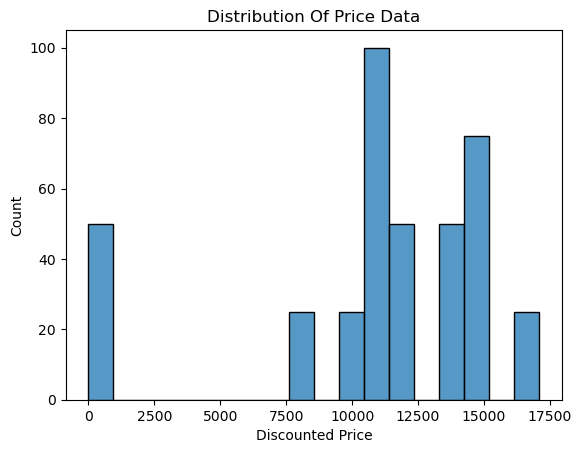

In [131]:
#  How prices are spread across different .
sns.histplot(x=df["Discounted Price"])
plt.title("Distribution Of Price Data")

<BarContainer object of 400 artists>

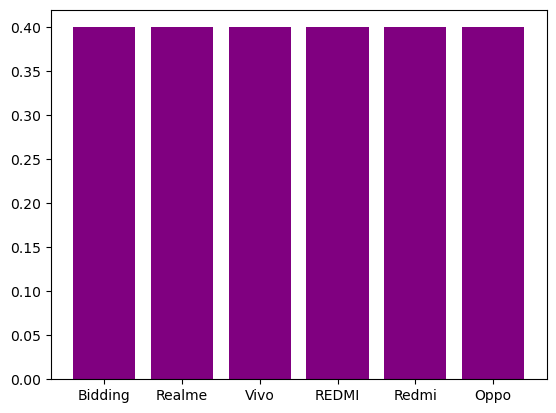

In [132]:
# Percentage of each brand type
plt.bar(df["Brand"],height=0.4,color='purple')

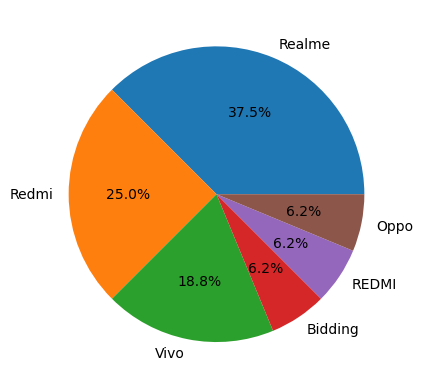

In [133]:
x=df["Brand"].value_counts()
plt.pie(x.values,labels=x.index,autopct='%1.1f%%')
plt.show()

<Axes: xlabel='Discount %', ylabel='Product Name'>

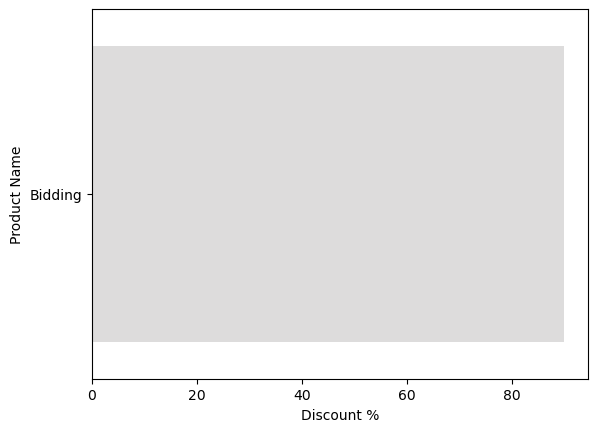

In [170]:
top_discounts = df.sort_values('Discount %', ascending=False).head(10)
sns.barplot(x='Discount %', y='Product Name', data=top_discounts, palette='coolwarm')

In [134]:
df1=df.groupby(["Discounted Price"]).count()["Brand"]
df1

Discounted Price
1.0        25
2.0        25
7799.0     25
10299.0    25
10599.0    75
11299.0    25
11599.0    50
13999.0    25
14099.0    25
14499.0    25
15099.0    50
17099.0    25
Name: Brand, dtype: int64

In [135]:
average_price_by_product_name = df.groupby('Product Name')['Discounted Price'].mean()
average_price_by_product_name

Product Name
Bidding                                        1.5
Oppo A77 4G Blue 4GB|64GB                  14499.0
REDMI 14C 5G Stardust Purple 4GB|128GB     10599.0
Realme C71 4G Sea Blue 4GB|64GB             7799.0
Realme C73 5G Jade Green 4GB|128GB         11599.0
Realme C73 5G Jade Green 4GB|64GB          10599.0
Realme C73 5G Onyx Black 4GB|128GB         11599.0
Realme C73 5G Onyx Black 4GB|64GB          10599.0
Redmi 13 5G Hawaiian Blue 6GB|128GB        14099.0
Redmi 15 5G Midnight Black 6GB|128GB       15099.0
Redmi 15 5G Sandy Purple 6GB|128GB         15099.0
Redmi Note 10S Shadow Black 6GB|128GB      13999.0
Vivo T4 Lite 5G Prism Blue 4GB|128GB       10299.0
Vivo T4 Lite 5G Titanium Gold 6GB|128GB    11299.0
Vivo Y35 Agate Black 8GB|128GB             17099.0
Name: Discounted Price, dtype: float64

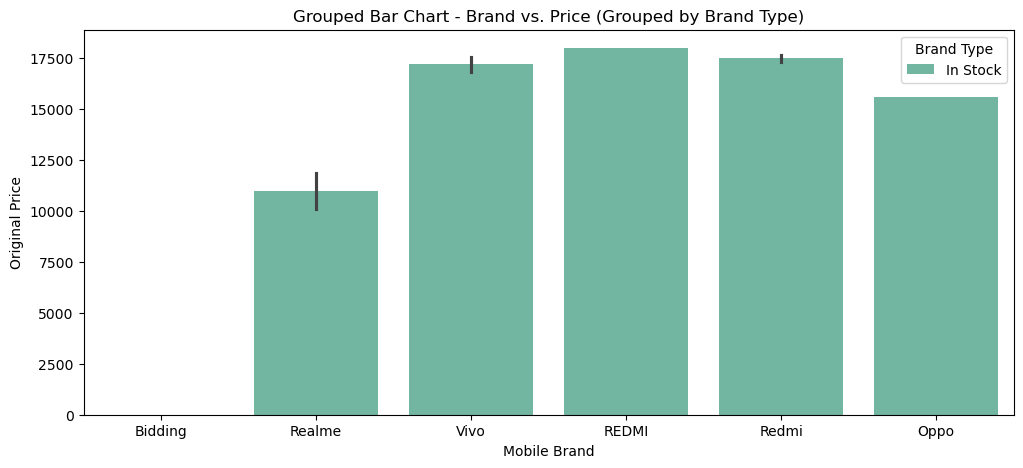

In [164]:
plt.figure(figsize=(12,5))
sns.barplot(x='Brand', y='Original Price', hue='Availability', data=df, palette='Set2')
plt.title('Grouped Bar Chart - Brand vs. Price (Grouped by Brand Type)')
plt.xlabel('Mobile Brand')
plt.ylabel('Original Price')
plt.legend(title='Brand Type')
plt.show()



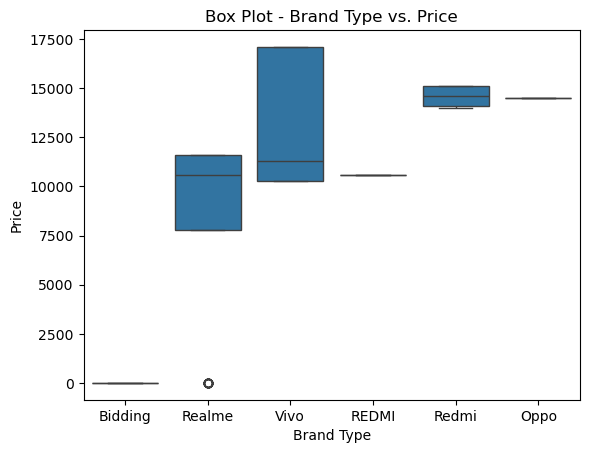

In [144]:
sns.boxplot(x='Brand', y='Discounted Price', data=df)
plt.title('Box Plot - Brand Type vs. Price')
plt.xlabel('Brand Type')
plt.ylabel('Price')
plt.show()

In [148]:
numerical_columns = df[['Discounted Price', 'Original Price', 'Discount %']]
numerical_columns.corr()

,Discounted Price,Original Price,Discount %
Discounted Price,1.000000,0.944164,-0.918872
Original Price,0.944164,1.000000,-0.830206
Discount %,-0.918872,-0.830206,1.000000


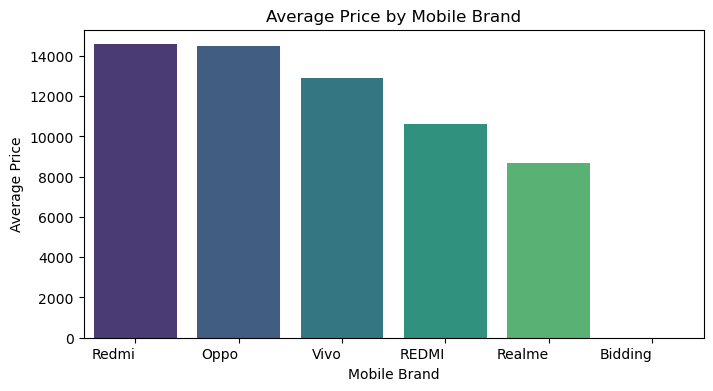

In [146]:
# Calculate the average price for each  model
average_price_by_Brand = df.groupby('Brand')['Discounted Price'].mean().reset_index()
# Sort the data by average price in descending order for better visualization
average_price_by_Brand = average_price_by_Brand.sort_values(by='Discounted Price', ascending=False)
# Create a grouped bar chart using Seaborn
plt.figure(figsize=(8,4))
sns.barplot(x='Brand', y='Discounted Price', data=average_price_by_Brand, palette='viridis')
plt.xticks(ha='right')
plt.title('Average Price by Mobile Brand')
plt.xlabel('Mobile Brand')
plt.ylabel('Average Price')
plt.show()

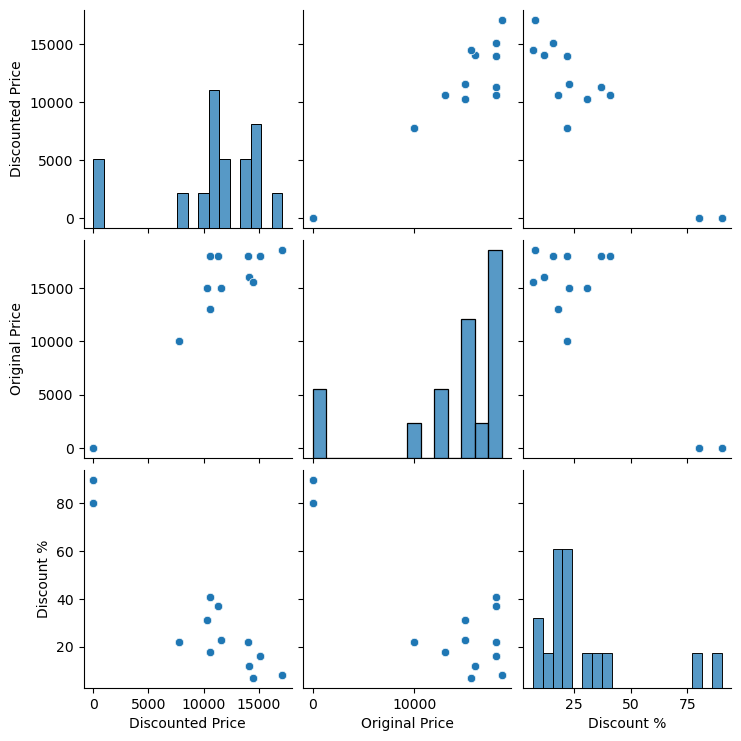

In [150]:
numerical_columns = df[['Discounted Price', 'Original Price', 'Discount %']]
sns.pairplot(numerical_columns)
plt.show()

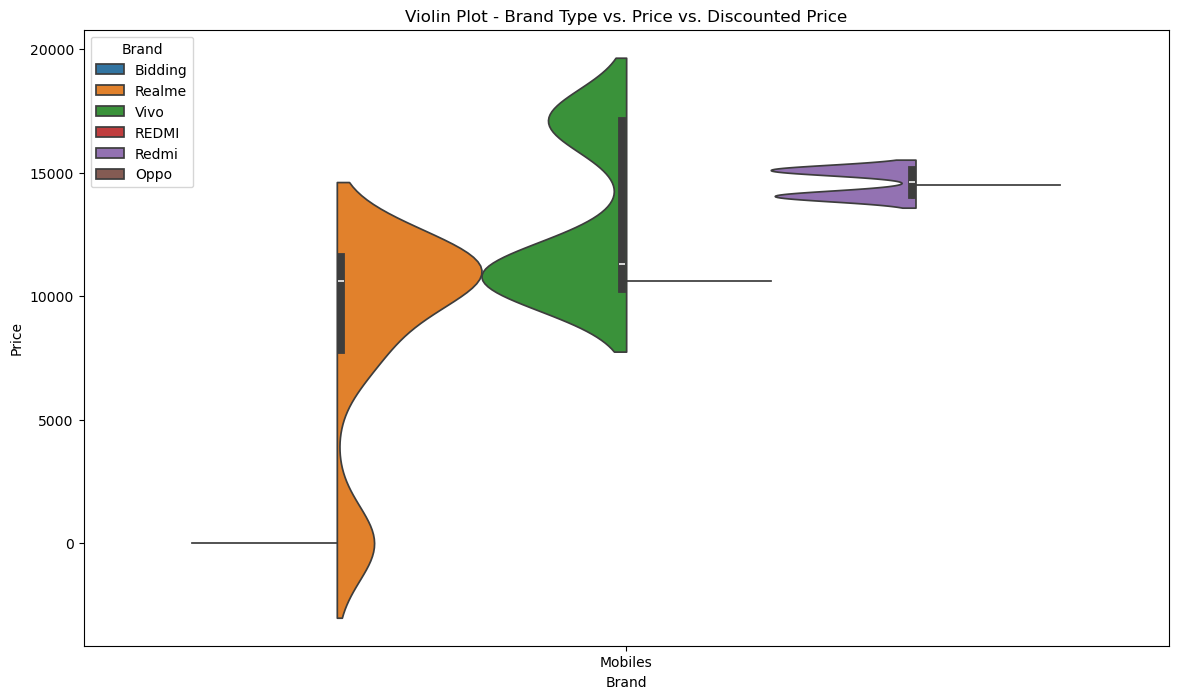

In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
sns.violinplot(x='Category', y='Discounted Price', hue='Brand', data=df, split=True)
plt.title('Violin Plot - Brand Type vs. Price vs. Discounted Price')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()